# # Project: Investigate a TMDB Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Data-Wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<ul>
    <li><a href="Which-genres-are-most-popular-from-year-to-year?">Which genres are most popular from year to year?</a></li>
    <li><a href="#What-kinds-of-properties-are-associated-with-movies-that-have-high-revenues?">What kinds of properties are associated with movies that have high revenues?</a></li>
    <li><a href="#Number-of-movies-per-year-over-the-year">Number of movies per year over the year</a></li>
    <li><a href="#Budget-vs.-Revenue-trend-over-the-years">Budget vs. Revenue trend over the years</a></li>
    <li><a href="#Top-5-Directors">Top 5 Directors</a></li>
    </ul>
</ul>
<li><a href="#Conclusions">conclusions</a></li>

# <a id='intro'></a>
## Introduction

> Here I am useing TMDB Movie Dataset. 

In [3]:
# mport statements for all of the packages that i am using for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# <a id='wrangling'></a>
## Data Wrangling


### General Properties

In [4]:
# Loading the dataset

movie_data = pd.read_csv('tmdb-movies.csv')
movie_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# Checking the data types and total number of data points before starting the analysis. 
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

# Describe the Data

In [6]:
movie_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


# Data Cleaning - Remove any empty rows and remove duplicate rows

In [7]:
# check is there any duplicate rows
sum(movie_data.duplicated())

1

In [8]:
# remove all duplicate rows
movie_data.drop_duplicates(inplace=True)

In [9]:
# check any null rows and sum them off
movie_data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### We drop cast and genres null value 

In [10]:
movie_data.dropna(subset=['genres'], inplace=True)  
movie_data.dropna(subset=['cast'], inplace=True)  
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10767 entries, 0 to 10865
Data columns (total 21 columns):
id                      10767 non-null int64
imdb_id                 10759 non-null object
popularity              10767 non-null float64
budget                  10767 non-null int64
revenue                 10767 non-null int64
original_title          10767 non-null object
cast                    10767 non-null object
homepage                2903 non-null object
director                10731 non-null object
tagline                 8010 non-null object
keywords                9322 non-null object
overview                10764 non-null object
runtime                 10767 non-null int64
genres                  10767 non-null object
production_companies    9791 non-null object
release_date            10767 non-null object
vote_count              10767 non-null int64
vote_average            10767 non-null float64
release_year            10767 non-null int64
budget_adj              1

# <a id='eda'></a>
## Exploratory Data Analysis


### Which genres are most popular from year to year?

Analysis : Drama is the most popular genres from year to year

In [11]:
# with this function we can get most popular genres

def most_popular_genres(movie_data):
    # split the genres
    genres_list = movie_data['genres'].str.cat(sep="|").split("|")
    # create new numpy series
    genres_list = pd.Series(genres_list).value_counts(ascending=True) 
    return genres_list


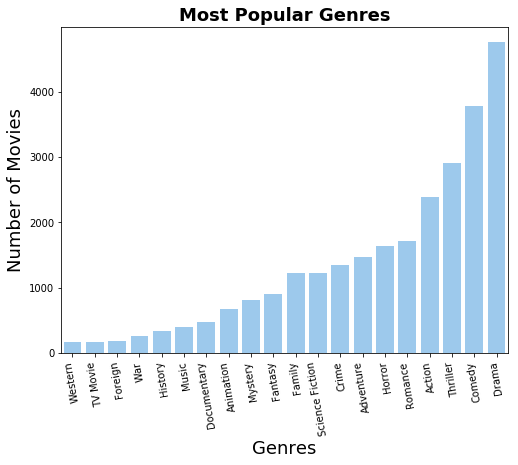

In [12]:
most_popu_genres = most_popular_genres(movie_data)
# copy the data
df_copy = most_popu_genres.copy()

# get index and value from copied data
most_pop_genres_index = df_copy.sort_values(ascending=True).index
most_pop_genres_values = df_copy.sort_values(ascending=True).values

#plotting the results
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = most_pop_genres_index,
            y = most_pop_genres_values,
            color='#90caf9',
            ax=ax)
ticks = plt.setp(ax.get_xticklabels(),rotation=100)
plt.title('Most Popular Genres', fontsize=18, fontweight='bold')
plt.ylabel('Number of Movies', fontsize=18)
plt.xlabel('Genres', fontsize=18)
del fig,ax,ticks

# What kinds of properties are associated with movies that have high revenues?
Analysis : The following properties are associated with movie that have high revenue is Revenue, Budget, Genres, Casts and Production Company, director

I have done analysis on based on it's genres, revenue, budget. Here are some Properties are associated with high revenue movies.

          Genres : Adventure         
          Revenue Mean:1645656693.200000
          Budget Mean:195200000.000000
          Population Mean: 9.763478
          
          Standard Deviation of revenue:117472853.73722328

In [13]:
#standard deviation of revenue
revenue_std = np.std(movie_data['revenue'])
revenue_std

117472853.73722328

In [14]:
# below method returns the 10th time higher value than revenue_std
def get_high_revenue_data():
    properties = []
    df = pd.DataFrame()
    for data_point in movie_data.loc[:,'revenue']:
            if data_point > (10.0 * revenue_std):
                properties.append(movie_data.loc[movie_data['revenue'] == data_point])
    return df.append(properties)

In [15]:
high_revenue_data = get_high_revenue_data()
most_popular_genres(high_revenue_data)

Drama              1
Romance            1
Animation          1
Crime              1
Family             2
Thriller           3
Fantasy            3
Science Fiction    6
Action             7
Adventure          8
dtype: int64

In [16]:
#this function gives the discription of data field and visualization of data
def describe_data(data, title): 
    print ('Mean of %s is %f' % (title, np.mean(data))) 
    print ('Standard Deviation of %s is %f' % (title, np.std(data)))
    print ('Minimum of %s is %f ' % (title, np.min(data)))
    print ('Maximum of %s is %f ' %(title, np.max(data)))
    print ('-----------------------------------')

In [17]:
# displaying the description of the data
describe_data(high_revenue_data['revenue'],"Revenue")
describe_data(high_revenue_data['budget'],"Budget")
describe_data(high_revenue_data['popularity'],"Popularity")

Mean of Revenue is 1645656693.200000
Standard Deviation of Revenue is 452017096.505688
Minimum of Revenue is 1215439994.000000 
Maximum of Revenue is 2781505847.000000 
-----------------------------------
Mean of Budget is 195200000.000000
Standard Deviation of Budget is 43201388.866563
Minimum of Budget is 125000000.000000 
Maximum of Budget is 280000000.000000 
-----------------------------------
Mean of Popularity is 9.763478
Standard Deviation of Popularity is 8.017844
Minimum of Popularity is 4.355219 
Maximum of Popularity is 32.985763 
-----------------------------------


# Number of movies per year over the year

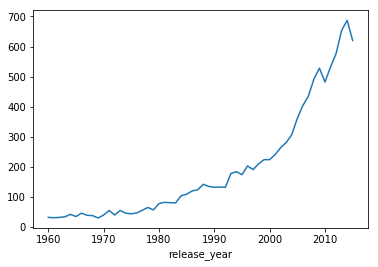

In [21]:
movies_year = movie_data.groupby(['release_year'])['original_title'].count()
movies_year.plot('line');

# Budget vs. Revenue trend over the years

In [24]:
movies_year_budget = movie_data.groupby(['release_year'])['budget'].sum()
movies_year_revenue = movie_data.groupby(['release_year'])['revenue'].sum()
budget_per_movie_year = movies_year_budget / movies_year

turnover_per_movie_year = movies_year_revenue / movies_year

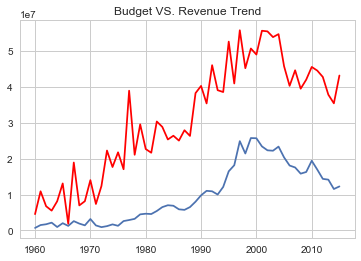

In [33]:
plt.plot(budget_per_movie_year[budget_per_movie_year.index > 1950])

plt.plot(turnover_per_movie_year[turnover_per_movie_year.index > 1950], 'r')
plt.title('Budget VS. Revenue Trend');

# Top 5 Directors 

In [37]:
top_grossing_directors = movie_data.groupby('director')['revenue'].mean()
top_grossing_directors.sort_values(ascending=False).head()

director
Kyle Balda|Pierre Coffin                     1.156731e+09
Lee Unkrich                                  1.063172e+09
Andrew Adamson|Kelly Asbury|Conrad Vernon    9.198388e+08
Andrew Stanton|Lee Unkrich                   8.646260e+08
Pete Docter                                  8.537086e+08
Name: revenue, dtype: float64

# <a id='conclusions'></a>
## Conclusions

Thus the most popular genre in most of the years is Drama. The table gives a list of the most popular genres from 1960 to 2015. The graphs shows the popularity distribution of the genre drama over the years in the given dataset and the distribution of genres in the movie set.
The movie's budget plays a crucial role in the popularity of the film. W have also analyse Top 5 Directors, Budget vs. Revenue trend over the years, We can also find Number of movies per year over the year is increasing From the cleaned dataset we have arrived at the relationship. We have remove duplicated from our analysis. 